In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [ ]:
img = image.load_img('/download (2).jpg')


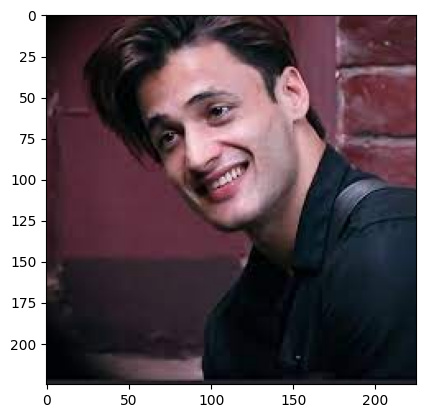

In [ ]:
plt.imshow(img)

In [ ]:
import cv2
import os

In [ ]:
i1=cv2.imread(r"/download (2).jpg")
i1

array([[[ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  3,  1],
        ...,
        [48, 37, 75],
        [50, 39, 77],
        [60, 50, 86]],

       [[ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  3,  1],
        ...,
        [42, 31, 69],
        [43, 32, 70],
        [43, 33, 69]],

       [[ 1,  4,  2],
        [ 1,  4,  2],
        [ 1,  4,  2],
        ...,
        [48, 37, 75],
        [50, 39, 77],
        [49, 39, 75]],

       ...,

       [[22, 18, 17],
        [22, 18, 17],
        [22, 18, 17],
        ...,
        [30, 21, 18],
        [30, 21, 18],
        [30, 21, 18]],

       [[42, 38, 37],
        [42, 38, 37],
        [42, 38, 37],
        ...,
        [47, 37, 37],
        [45, 37, 37],
        [47, 37, 37]],

       [[40, 36, 35],
        [40, 36, 35],
        [40, 36, 35],
        ...,
        [43, 34, 37],
        [41, 34, 37],
        [43, 35, 36]]], dtype=uint8)

In [ ]:
i1.shape

(225, 225, 3)

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(r'/content/drive/MyDrive/datasets/training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory(r'/content/drive/MyDrive/datasets/validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 71 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [ ]:

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.01),
              metrics=['accuracy']
              )

In [ ]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=10,
                    validation_data=validation_dataset)

10/10 [==============================] - 4s 348ms/step - loss: 3.0979 - accuracy: 0.4828


In [ ]:
dir_path=r'/content/drive/MyDrive/datasets/testing'
for i in os.listdir(dir_path):
  print(i)

images (16) - Copy.jpg
images (7).jpg
images (6).jpg
images (8).jpg
images (5).jpg
download.12jpg.jpg
images (13) - Copy - Copy.jpg
download (2) - Copy - Copy.jpg
images (17) - Copy.jpg
images (1).jpg
download.jpg
images (4).jpg
images (3).jpg


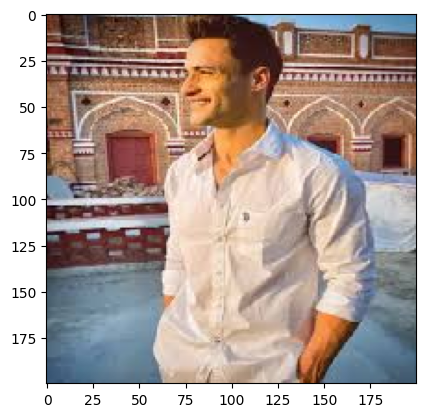

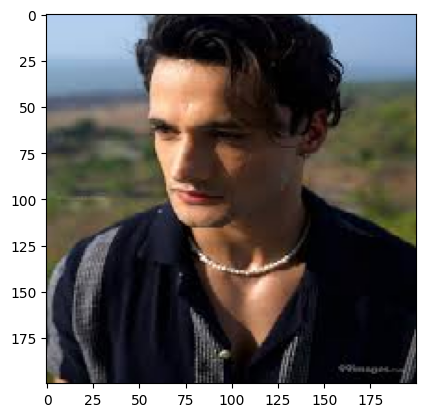

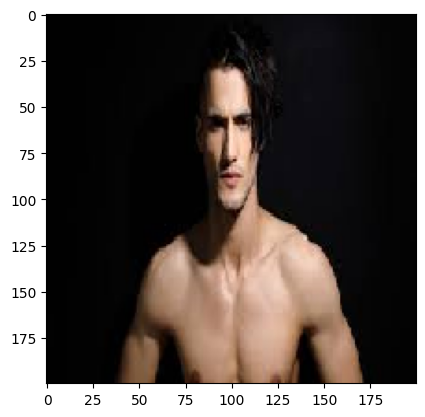

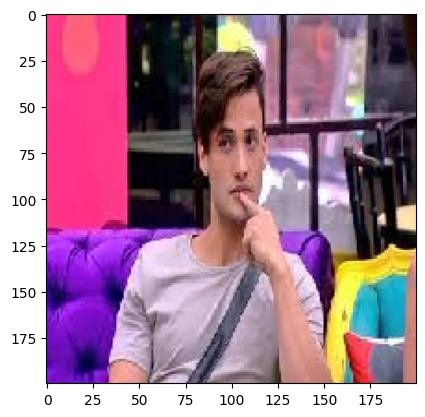

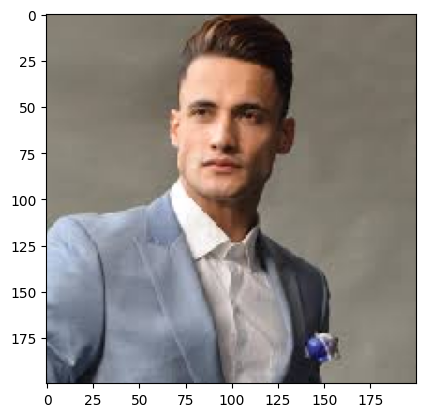

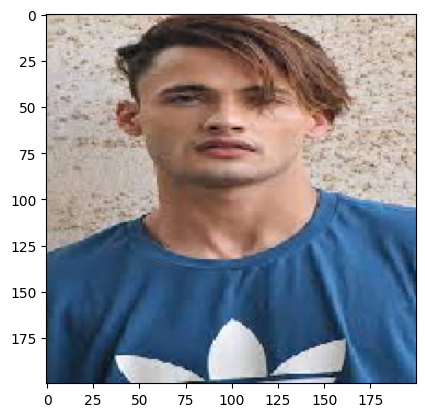

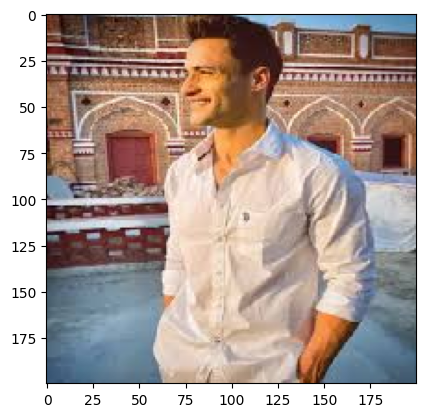

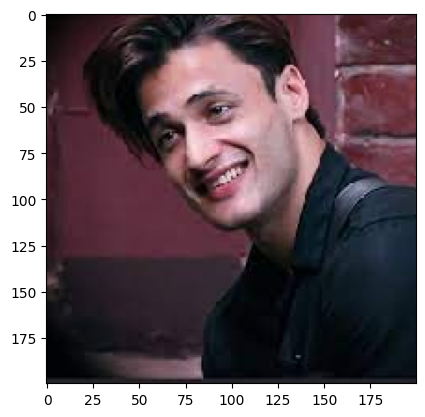

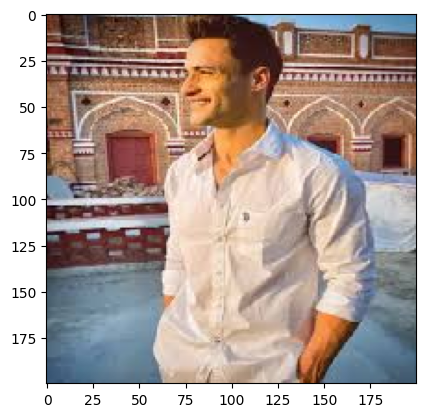

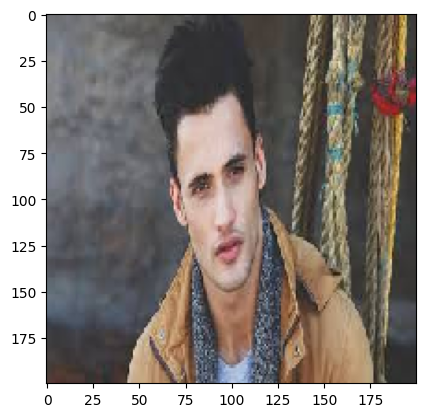

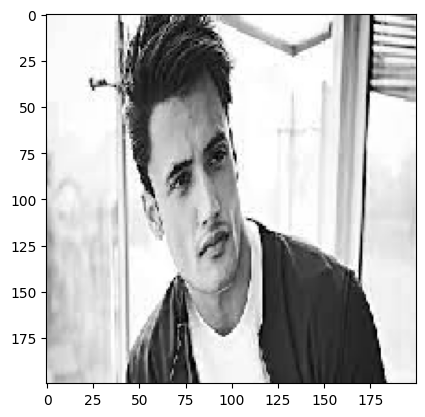

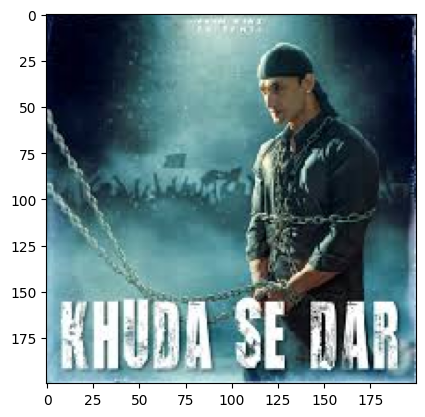

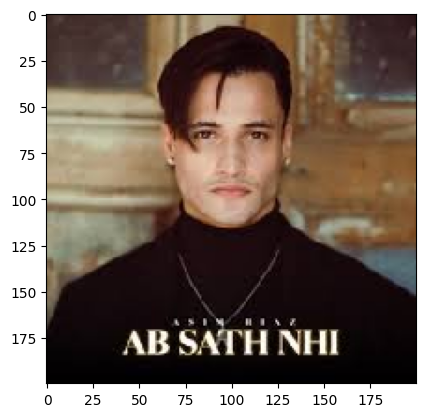

In [ ]:
dir_path=r'/content/drive/MyDrive/datasets/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()


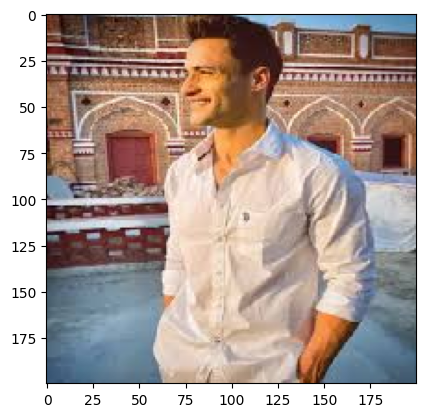

1/1 [==============================] - 0s 69ms/step
i am happy


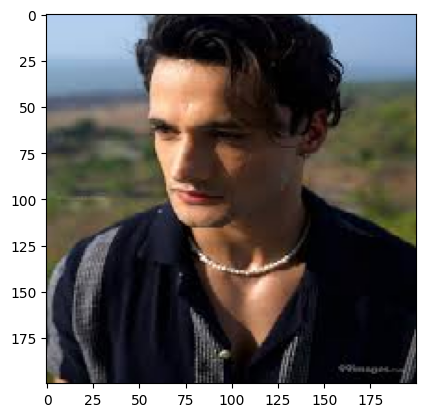

1/1 [==============================] - 0s 33ms/step
i am happy


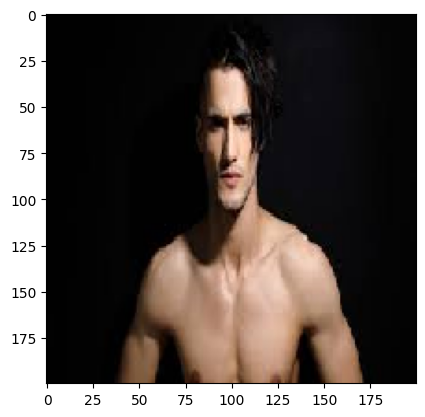

1/1 [==============================] - 0s 24ms/step
i am not happy


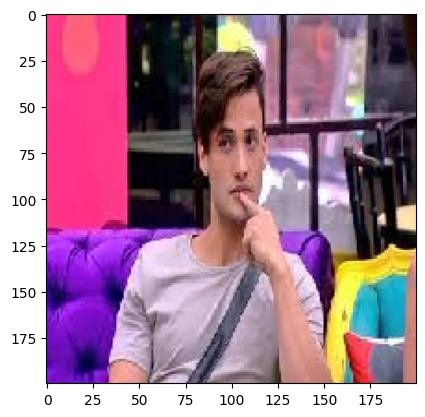

1/1 [==============================] - 0s 30ms/step
i am happy


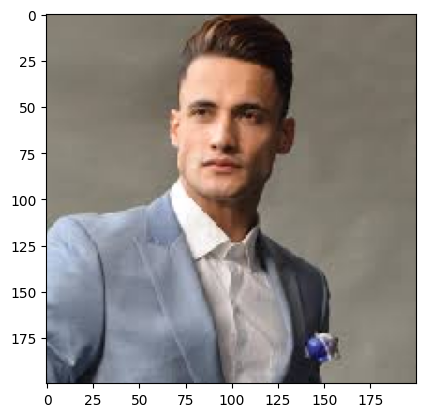

1/1 [==============================] - 0s 29ms/step
i am not happy


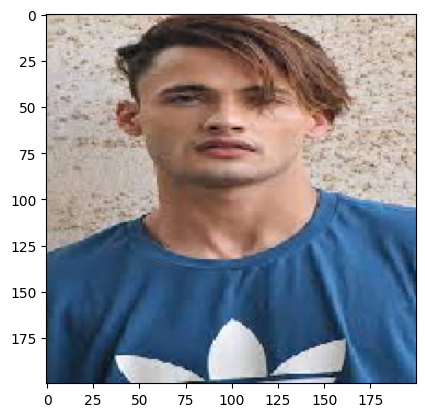

1/1 [==============================] - 0s 28ms/step
i am not happy


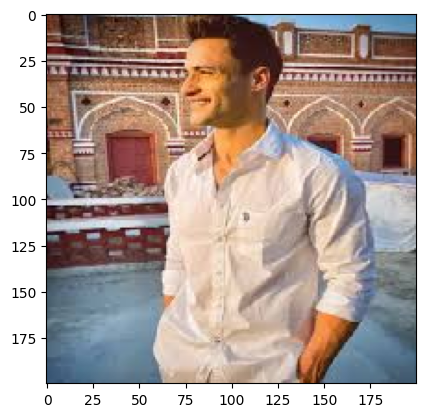

1/1 [==============================] - 0s 48ms/step
i am happy


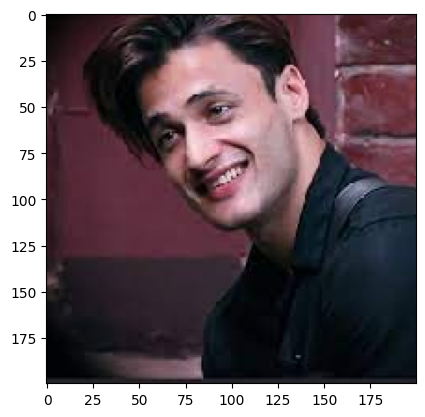

1/1 [==============================] - 0s 31ms/step
i am happy


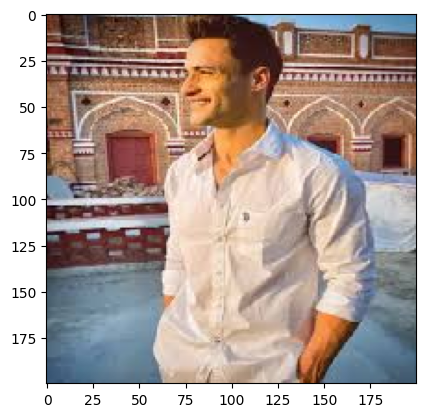

1/1 [==============================] - 0s 33ms/step
i am happy


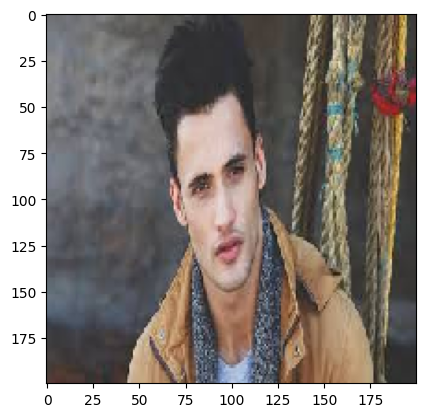

1/1 [==============================] - 0s 32ms/step
i am happy


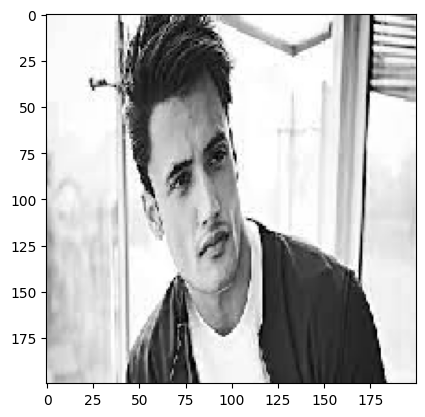

1/1 [==============================] - 0s 33ms/step
i am happy


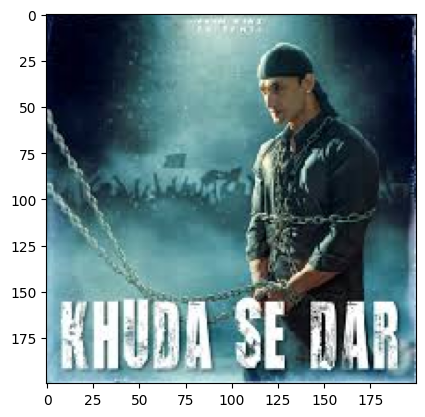

1/1 [==============================] - 0s 32ms/step
i am not happy


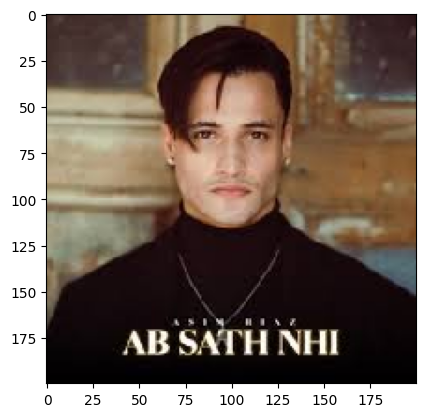

1/1 [==============================] - 0s 32ms/step
i am not happy


In [ ]:
dir_path=r'/content/drive/MyDrive/datasets/testing'
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])

  val=model.predict(images)
  if val==0:
    print('i am happy')
  else:
    print('i am not happy')
